In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

from statsmodels.tsa.seasonal import seasonal_decompose

/Users/VardonPaul/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
trainE = []
with open('input/TrainSet.txt', 'r') as file:
    s = file.readlines()
    for i in s:
        trainE.append([np.float32(j) for j in i.split(" ")[: -2]])

testE = []
with open('input/TestSet.txt', 'r') as file:
    s = file.readlines()
    for i in s:
        testE.append([np.float32(j) for j in i.split(" ")[: -2]])

result = []
with open('input/TestSet_RUL.txt', 'r') as file:
    s = file.readlines()
    for i in s:
        result.append(int(i[: -2]))
result = np.array(result)

In [3]:
names = ["id", "cycle"] + ["setting_" + str(i) for i in range(3)] + ["s_" + str(i) for i in range(21)]
train = pd.DataFrame(trainE, columns=names)
test = pd.DataFrame(testE, columns=names)

In [4]:
n_train, n_features = train.shape
n_test = test.shape[0]
n_turb = result.shape[0]
train_failure = np.zeros(n_turb)
for i in range(n_turb):
    train_failure[i] = train[train['id'] == (i + 1)].cycle.max()
test_end = np.zeros(n_turb)
for i in range(n_turb):
    test_end[i] = test[test['id'] == (i + 1)].cycle.max()

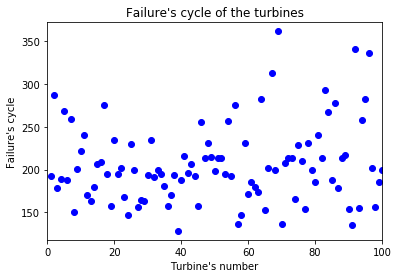

In [5]:
# Visualize the failure tendancy for the motors
plt.figure()
plt.plot(range(1, n_turb + 1), train_failure, 'bo')
plt.xlabel("Turbine's number")
plt.ylabel("Failure's cycle")
plt.title("Failure's cycle of the turbines")
plt.axis([0, 100, train_failure.min() - 10, train_failure.max() + 10])
plt.show()

Turbine nb 20


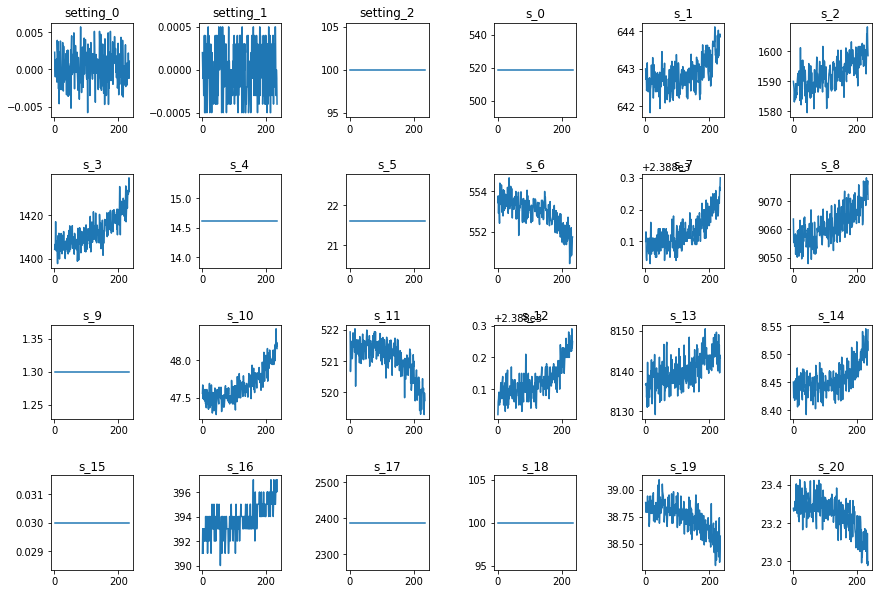

Turbine nb 40


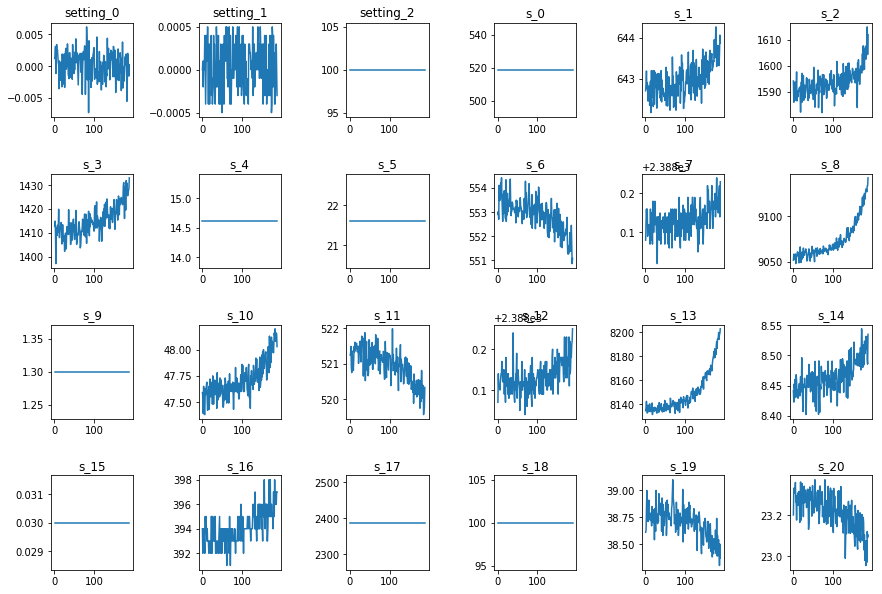

Turbine nb 60


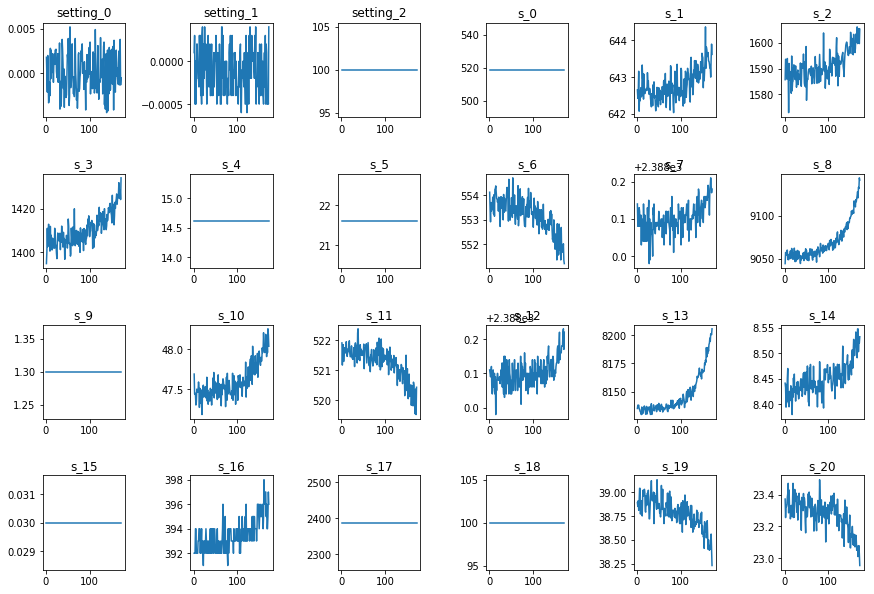

Turbine nb 80


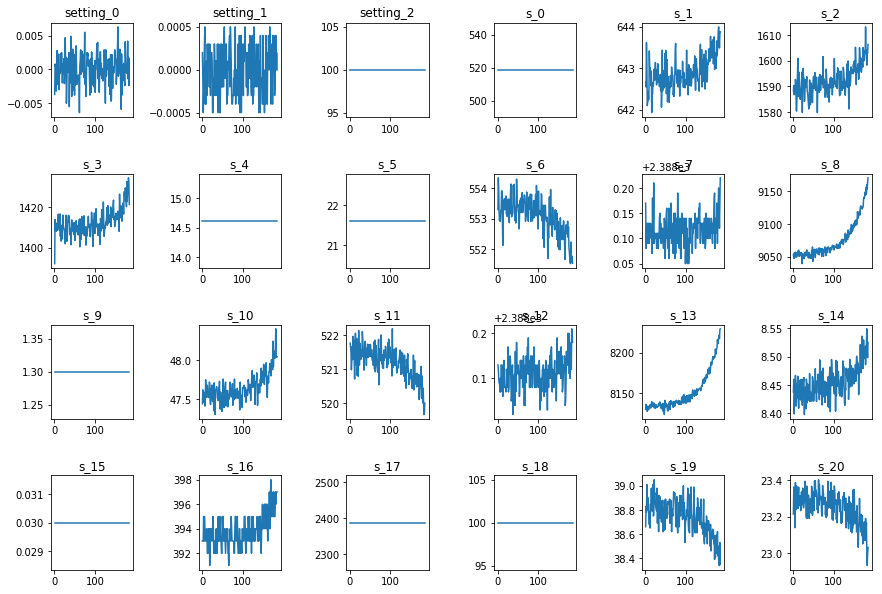

Turbine nb 100


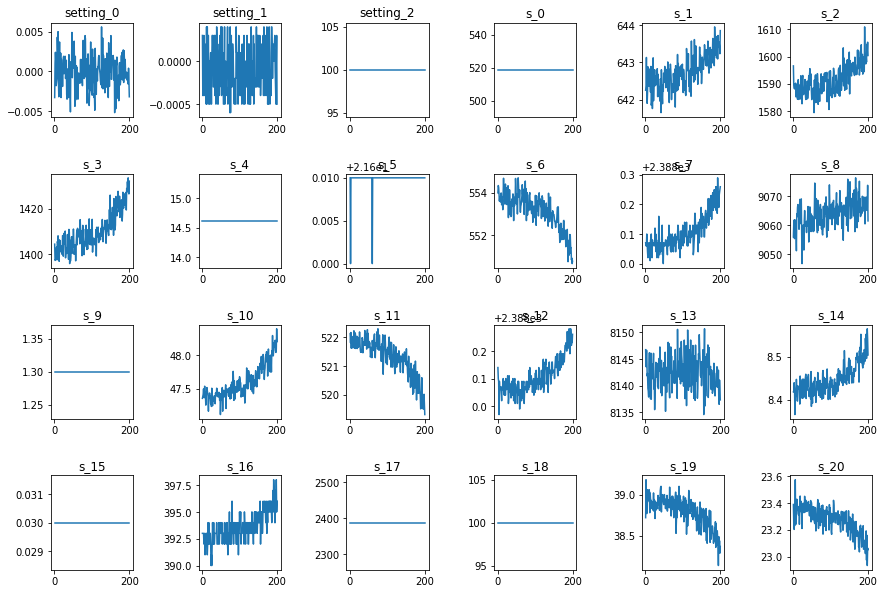

In [6]:
# Visualize the evolution of each feature in time (for turbine 1%10 to 100%10)
def timeEvolution(turb):
    plt.figure(1)
    i = 1
    for col in train.columns[2:]:
        plt.subplot(4, 6, i)
        plt.plot(train[train["id"] == turb].cycle, train[train["id"] == turb][col])
        # plt.plot(test[test["id"] == turb].cycle, test[test["id"] == turb][col], color='red')
        plt.title(col)
        plt.subplots_adjust(top=2, bottom=0.1, left=0.1, right=2, hspace=0.6, wspace=0.8)
        i += 1
    plt.show()

for i in range(1, 6):
    print("Turbine nb " + str(i * 20))
    timeEvolution(i * 20)

In [7]:
# We try to see if the following features have flat values.
flatValueList = ["setting_2", "s_0", "s_4", "s_5", "s_9", "s_15", "s_17", "s_18"]
for val in flatValueList:
    comp = 0
    for i in range(1, n_turb + 1):
        if train[train["id"] == i][val].std() != 0:
            comp += 1
    if comp > 0:
        print("The values of feature " + val + " are not flat for " + str(comp) + " turbines.")
    else:
        print("The values of feature " + val + " are flat.")

The values of feature setting_2 are flat.
The values of feature s_0 are flat.
The values of feature s_4 are flat.
The values of feature s_5 are not flat for 62 turbines.
The values of feature s_9 are flat.
The values of feature s_15 are flat.
The values of feature s_17 are flat.
The values of feature s_18 are flat.


In [9]:
for col in train.columns[2:]:
    s = np.array(train[col].describe())
    k = col.find("_")
    c = col[:k] + "\\" + col[k:] + " & " + str(s[1])
    for i in s[2:]:
        c += " & " + str(i)
    c += " \\" + "\\"
    print(c)

setting\_0 & -8.87014690644e-06 & 0.00218731345627 & -0.00870000012219 & -0.00150000001304 & 0.0 & 0.00150000001304 & 0.00870000012219 \\
setting\_1 & 2.35083144494e-06 & 0.000293062128227 & -0.000600000028498 & -0.000199999994948 & 0.0 & 0.000300000014249 & 0.000600000028498 \\
setting\_2 & 100.0 & 0.0 & 100.0 & 100.0 & 100.0 & 100.0 & 100.0 \\
s\_0 & 518.66998291 & 0.0 & 518.66998291 & 518.66998291 & 518.66998291 & 518.66998291 & 518.66998291 \\
s\_1 & 642.680933616 & 0.500053142035 & 641.210021973 & 642.325012207 & 642.640014648 & 643.0 & 644.530029297 \\
s\_2 & 1590.52311854 & 6.13114950223 & 1571.04003906 & 1586.26000977 & 1590.09997559 & 1594.38000488 & 1616.91003418 \\
s\_3 & 1408.93378159 & 9.00060461018 & 1382.25 & 1402.35998535 & 1408.04003906 & 1414.55505371 & 1441.48999023 \\
s\_4 & 14.6199998856 & 0.0 & 14.6199998856 & 14.6199998856 & 14.6199998856 & 14.6199998856 & 14.6199998856 \\
s\_5 & 21.6098038146 & 0.00138901670405 & 21.6000003815 & 21.6100006104 & 21.6100006104 & 2

In [10]:
for col in test.columns[2:]:
    s = np.array(test[col].describe())
    k = col.find("_")
    c = col[:k] + "\\" + col[k:] + " & " + str(s[1])
    for i in s[2:]:
        c += " & " + str(i)
    c += " \\" + "\\"
    print(c)

setting\_0 & -1.11789863787e-05 & 0.00220268508734 & -0.00820000004023 & -0.00150000001304 & 0.0 & 0.00150000001304 & 0.0077999997884 \\
setting\_1 & 4.23793538814e-06 & 0.00029403057086 & -0.000600000028498 & -0.000199999994948 & 0.0 & 0.000300000014249 & 0.000699999975041 \\
setting\_2 & 100.0 & 0.0 & 100.0 & 100.0 & 100.0 & 100.0 & 100.0 \\
s\_0 & 518.66998291 & 0.0 & 518.66998291 & 518.66998291 & 518.66998291 & 518.66998291 & 518.66998291 \\
s\_1 & 642.475087711 & 0.40089908502 & 641.130004883 & 642.197509766 & 642.460021973 & 642.739990234 & 644.299987793 \\
s\_2 & 1588.09920385 & 5.00327402445 & 1569.04003906 & 1584.59997559 & 1587.98999023 & 1591.36248779 & 1607.55004883 \\
s\_3 & 1404.73536205 & 6.6883092184 & 1384.39001465 & 1399.94995117 & 1404.43994141 & 1409.05004883 & 1433.35998535 \\
s\_4 & 14.6199998856 & 0.0 & 14.6199998856 & 14.6199998856 & 14.6199998856 & 14.6199998856 & 14.6199998856 \\
s\_5 & 21.6097012755 & 0.00170412375945 & 21.6000003815 & 21.6100006104 & 21.6100

In [11]:
print(pd.Series(train_failure).describe())

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
dtype: float64


In [12]:
predict = np.array(pd.read_csv('output/submit_test.csv')).reshape(93)
result.shape

(100,)